# **GOOGLE Playstore EDA**

**AuthorName**: Samia Nadeem\
**Email**: samianadeem247@gmail.com

### About Dataset

- `Description`:
This dataset is downloaded from [link](https://www.kaggle.com/datasets/lava18/google-play-store-apps/?select=googleplaystore.csv)

- `Context`
While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

- `Content`
Each app (row) has values for catergory, rating, size, and more.

- `Acknowledgements`
This information is scraped from the Google Play Store. This app information would not be available without it.


- `Inspiration`
The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

## 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- Let's load the dataset and have a look on top 5 rows

In [2]:
df=pd.read_csv("./googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


- Important things to know

In [651]:
# Set option rows and columns to be max
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# hide warnings
import warnings
warnings.filterwarnings('ignore')

#Avoid values in scientific notation
# pd.set_option('display.float_format', '{:.0f}'.format)

In [652]:
print(f"Name of columns in this dataset are as follows: {df.columns}")

Name of columns in this dataset are as follows: Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [653]:
print(f"The number of rows are: {df.shape[0]} and the number of columns are: {df.shape[1]}")

The number of rows are: 10841 and the number of columns are: 13


In [654]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [655]:
df.describe()

,Rating,Reviews
count,9367.000000,1.084100e+04
mean,4.191513,4.441119e+05
std,0.515735,2.927629e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.476800e+04
max,5.000000,7.815831e+07


 # Types Of Columns in our Dataset
 **Numeric:** Rating, Reviews, Size,  Price \
 **Categorial:** Category , Installs, Type , Content Rating, Genres\
 **Mixed:** App, Last Updated ,Current Ver,	Android Ver


### **Check Missing values:**

In [656]:
df.isnull().sum()

App                  0
Category             1
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

### **Conversion of DataTypes:**

### How to make Size column a numeric column??

In [4]:
df.Size.value_counts().head(10)

Size
Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
15M                    184
17M                    160
19M                    154
26M                    149
16M                    149
Name: count, dtype: int64


#### Observations:
1. Varies with device
2. M
3. K
-----

- Now cleaning the size column
- Converting datatype from object to float

In [5]:
df['Size'] = df['Size'].apply(
    lambda x: float(x.replace('M', '')) if isinstance(x, str) and 'M' in x
    else float(x.replace('k', '')) / 1024 if isinstance(x, str) and 'k' in x
    else np.nan
)
df.Size.astype('float32')


0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     NaN
10840    19.0
Name: Size, Length: 10841, dtype: float32

### Installs column :

In [6]:
df.Installs.value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             908
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64

- Cleaning installs column
- Converting datatype to int

In [660]:
df['Installs'] = (
    df['Installs']
    .str.replace('+', '', regex=False)
    .str.replace(',', '', regex=False)
    .astype(int)
)
# making a new column called 'Installs_category' which will have the category of the installs
bins = [-1, 0, 10, 1000, 10000, 100000, 1000000, 10000000, 10000000000]
labels=['no', 'Very low', 'Low', 'Moderate', 'More than moderate', 'High', 'Very High', 'Top Notch']
df['Installs_category'] = pd.cut(df['Installs'], bins=bins, labels=labels)

In [661]:
df.describe()


,Rating,Reviews,Size,Installs
count,9367.000000,1.084100e+04,9146.000000,1.084100e+04
mean,4.191513,4.441119e+05,21.514141,1.546291e+07
std,0.515735,2.927629e+06,22.588679,8.502557e+07
min,1.000000,0.000000e+00,0.008301,0.000000e+00
25%,4.000000,3.800000e+01,4.900000,1.000000e+03
50%,4.300000,2.094000e+03,13.000000,1.000000e+05
75%,4.500000,5.476800e+04,30.000000,5.000000e+06
max,5.000000,7.815831e+07,100.000000,1.000000e+09


### How to make Price column a numeric column??

In [7]:
df.Price.value_counts()

Price
0          10041
$0.99        148
$2.99        129
$1.99         73
$4.99         72
           ...  
$3.61          1
$394.99        1
$1.26          1
$1.20          1
$1.04          1
Name: count, Length: 92, dtype: int64

In [663]:
df['Price'] = (
    df['Price']
    .str.replace('$', '', regex=False)
    .str.replace(',', '', regex=False)
    .astype(float)
)

In [664]:
# Checking min , max , and average price of apps
print(f"Minimum Price of an app is: ${df.Price.min()}")
print(f"Maximum Price of an app is: ${df.Price.max()}")
print(f"Average Price of an app is: ${df.Price.mean():.2f}")

Minimum Price of an app is: $0.0
Maximum Price of an app is: $400.0
Average Price of an app is: $1.03


# 2. Descriptive Statistics

In [665]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,9367.000000,1.084100e+04,9146.000000,1.084100e+04,10841.000000
mean,4.191513,4.441119e+05,21.514141,1.546291e+07,1.027273
std,0.515735,2.927629e+06,22.588679,8.502557e+07,15.948971
min,1.000000,0.000000e+00,0.008301,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,4.900000,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,13.000000,1.000000e+05,0.000000
75%,4.500000,5.476800e+04,30.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


#### Observations:
- We have 5 numeric columns
- We observed that `Rating` column has min rating of 1 and max rating of 5
- We observed that an app's min `price` is 0$ and max price is 400$
- `Reviews` column tell us that on average 4.441119 people give reviews to an app
----

### **2.1. Check Missing Values:**

In [666]:
df.isnull().sum()

App                     0
Category                1
Rating               1474
Reviews                 0
Size                 1695
Installs                0
Type                    1
Price                   0
Content Rating          0
Genres                  1
Last Updated            0
Current Ver             8
Android Ver             2
Installs_category       0
dtype: int64

In [667]:
# %age of missing values
round((df.isnull().sum()/len(df))*100,2).sort_values(ascending=False)

Size                 15.64
Rating               13.60
Current Ver           0.07
Android Ver           0.02
Category              0.01
Type                  0.01
Genres                0.01
Installs              0.00
App                   0.00
Reviews               0.00
Content Rating        0.00
Price                 0.00
Last Updated          0.00
Installs_category     0.00
dtype: float64

<Axes: >

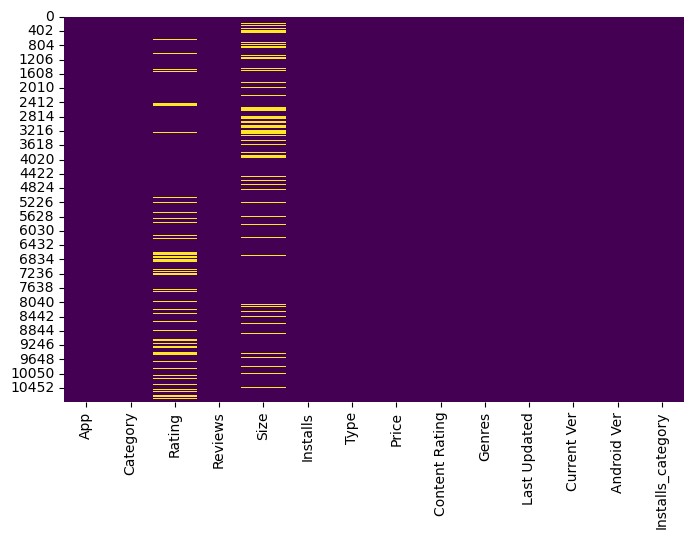

In [668]:
# Plot graphical representation of missing values
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

Text(0.5, 1.0, 'Percentage of missing values in each column')

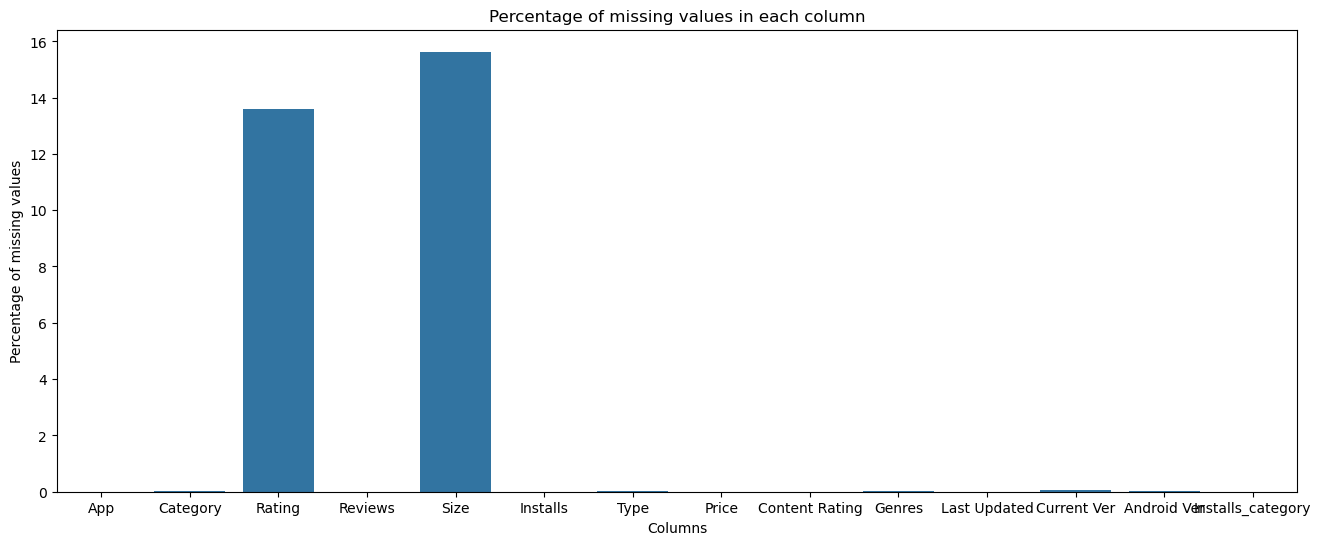

In [669]:
# Plot graph of missing values
missing_percentage = (df.isnull().sum()/len(df))*100
plt.figure(figsize=(16,6))
sns.barplot(x=missing_percentage.index, y=missing_percentage.values)
plt.xlabel("Columns")
plt.ylabel("Percentage of missing values")
plt.title("Percentage of missing values in each column")

<Axes: >

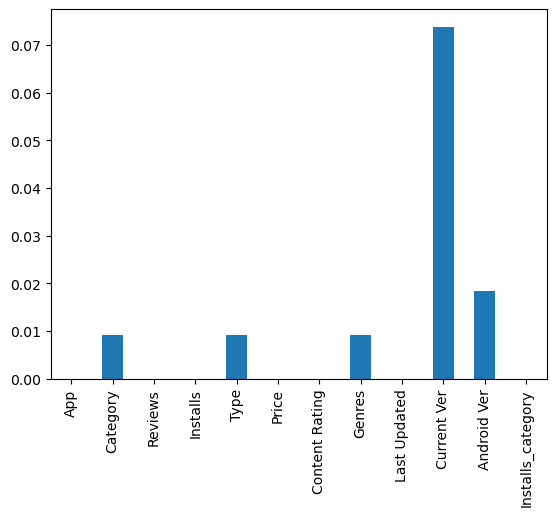

In [670]:
# Missing percentage of less than 1%
missing_percentage[missing_percentage<1].plot(kind='bar')

#### Observations:
- We have 1695 missing values in the `Size`column , which is 15.64%  the total values in the column.  
- We have 1474 missing values in the `Rating` column, which is 13.6% of the total values in the column.
- We have 8 missing value in the `Current Ver` column, which is 0.07% of the total values in the column.
- We have 2 missing values in the `Android Ver` column, which is 0.02% of the total values in the column.
- We have only 1 missing value in `Category`, `Type` and `Genres` columns, which is  0.01% of the total values in the column.  
----


### **2.2. Dealing Missing Values:**

- First we will will check whether the columns that have missing values `[Size, Rating, Current Ver, Android Ver, Category, Type, Genres]` are strongly corelated to some other column or not.
- Then we will see , either removing them or imputing them will have effect on other columns or not

In [671]:
# Find correlation between numerical features
num_df = df.select_dtypes(include='number')
corr = num_df.corr()
corr

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.068147,0.084098,0.051393,-0.021851
Reviews,0.068147,1.000000,0.238218,0.643123,-0.009666
Size,0.084098,0.238218,1.000000,0.164794,-0.023000
Installs,0.051393,0.643123,0.164794,1.000000,-0.011688
Price,-0.021851,-0.009666,-0.023000,-0.011688,1.000000


<Axes: >

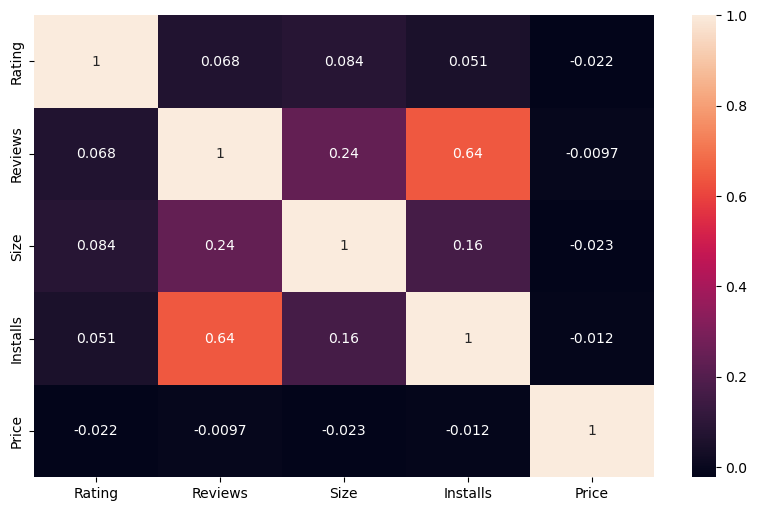

In [672]:
# Plot correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True)

#### Observations
- `Rating` is mostly independent of other features, but if a person hasn't installed an app then how it can have a rating. So we will not impute it.
- `Reviews` and `Installs` are highly correlated, it means if more reviews ,then more installs.
- `Size` has almost no effect on popularity or rating.
- `Price` doesn’t matter much
 -----
 

In [673]:
#Rows before removing missing values
print(f"Number of rows before removing missing values: {df.shape[0]}")

Number of rows before removing missing values: 10841


In [674]:
# Removing rows with missing values hasving % less than 1%
df = df.dropna(subset=['Genres', 'Category', 'Type', 'Current Ver', 'Android Ver'])
# Rows after removing missing values
print(f"Number of rows after removing missing values: {df.shape[0]}")


Number of rows after removing missing values: 10829


- We have removed 12 Rows having null values in [Current Ver, Android Ver, Category, Type, Genres] columns.

In [675]:
df.isnull().sum().sort_values(ascending=False)

Size                 1694
Rating               1469
Category                0
App                     0
Reviews                 0
Installs                0
Type                    0
Price                   0
Content Rating          0
Genres                  0
Last Updated            0
Current Ver             0
Android Ver             0
Installs_category       0
dtype: int64

#### Observations:
- Only `Rating` and `Size` has missing values
- Size can't be imputed because every app has different size and nobody can predict that as nearly as possible.
- `Rating` is highly correlated with installs column.
----

#### **Imputation of Rating column:**
- We can't directly impute the mean of our rating column, because if 0 installs then how any rating is possible for that particular app
- As we know that Rating increases with no. of installs, and it decreases with no. of installs, which means it is highly correlated 
- So instead of imputing the mean of whole column , we will make bins or categories of no. of installs, name the column as `Installs_Category`, then impute the mean of rating as per install_category.
- How will we impute mean of each category ?
  - Find mean of ratings of each Install_category
  - Check the category of app with null rating 
  - Impute the mean of that category

In [676]:
df.groupby('Installs_category')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Installs_category,,,,,,,,
no,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Very low,81.0,4.637037,0.845199,1.0,4.8,5.0,5.0,5.0
Low,1278.0,4.170970,0.825605,1.0,3.8,4.4,4.8,5.0
Moderate,1440.0,4.035417,0.604428,1.4,3.8,4.2,4.5,5.0
More than moderate,1616.0,4.093255,0.505619,1.6,3.9,4.2,4.5,4.9
High,2113.0,4.207525,0.376594,1.8,4.0,4.3,4.5,4.9
Very High,2004.0,4.287076,0.294902,2.0,4.1,4.3,4.5,4.9
Top Notch,828.0,4.374396,0.193726,3.1,4.3,4.4,4.5,4.8


In [677]:
#Check how many rows in each install category have missing values in 'Rating' column
df[df['Rating'].isnull()].groupby('Installs_category').size().sort_values(ascending=False)

Installs_category
Low                   880
Very low              453
Moderate               88
More than moderate     31
no                     14
High                    3
Very High               0
Top Notch               0
dtype: int64

In [678]:
print("Missing values in Rating column:", df['Rating'].isnull().sum())

Missing values in Rating column: 1469


In [679]:
#Imputing values
df['Rating'] = df['Rating'].fillna(
    df.groupby('Installs_category')['Rating'].transform('mean')
)


In [680]:
print("Missing values in Rating column after imputation:", df['Rating'].isnull().sum())

Missing values in Rating column after imputation: 14


Text(0.5, 1.0, 'Boxplot of Ratings by Installs Category')

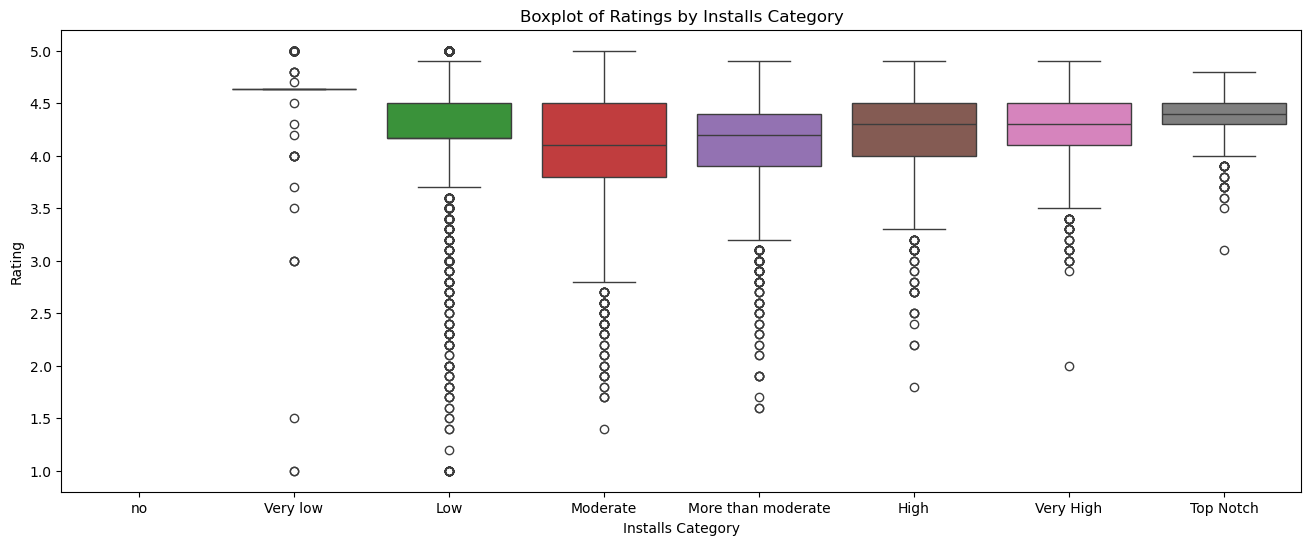

In [681]:
plt.figure(figsize=(16,6))
sns.boxplot(x='Installs_category', y='Rating', hue='Installs_category', data=df)
plt.xlabel('Installs Category')
plt.ylabel('Rating')
plt.title('Boxplot of Ratings by Installs Category')

#### Observations:
- The `Rating` column had  1469 missing values,missing values were imputed using the mean rating for each install category.
- Applications with *no* installs consistently show missing rating values, which is expected since ratings can only be provided by users after installing the app.
---

### **Key point:**
**From a statistical (Pearson) view:**

- Installs increase strongly with Reviews, not with Rating.

**From a real-world logic view:**

- An app must be installed to be rated → so installs and ratings are related.

So , we plot Installs , Reviews and Ratings.

---



We can similarly check for `Review` and `Installs`:

Text(0.5, 1.0, 'Boxplot of Reviews by Installs Category')

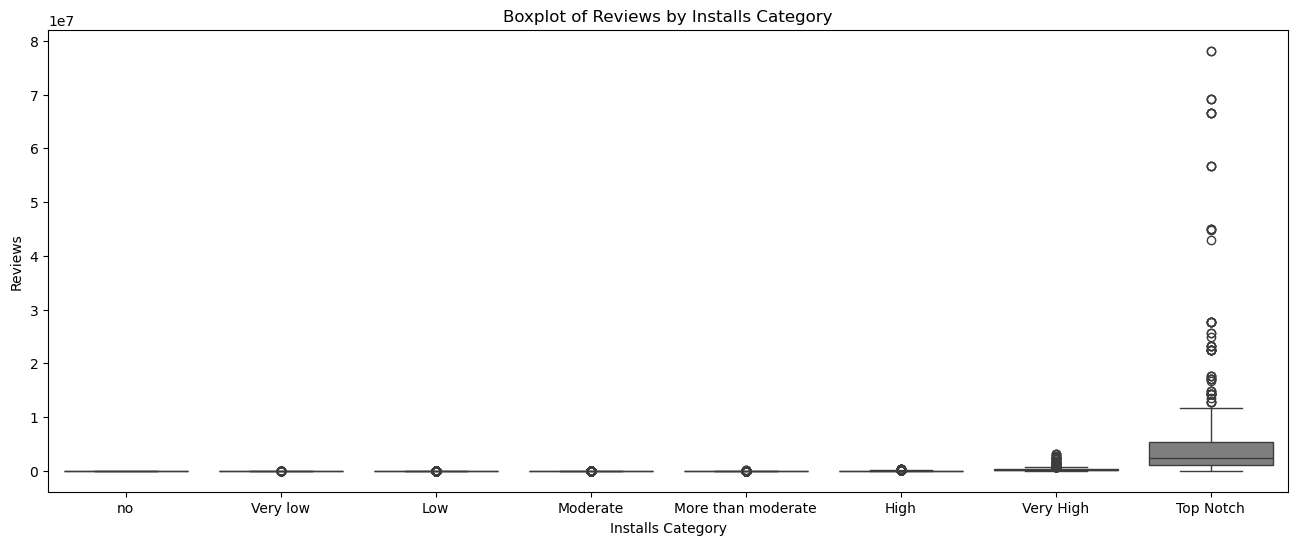

In [682]:
plt.figure(figsize=(16,6))
sns.boxplot(x='Installs_category', y='Reviews', hue='Installs_category', data=df)
plt.xlabel('Installs Category')
plt.ylabel('Reviews')
plt.title('Boxplot of Reviews by Installs Category')

- Values are on very large scale , so we will normalize the data and then plot it 

Text(0.5, 1.0, 'Boxplot of Reviews by Installs Category')

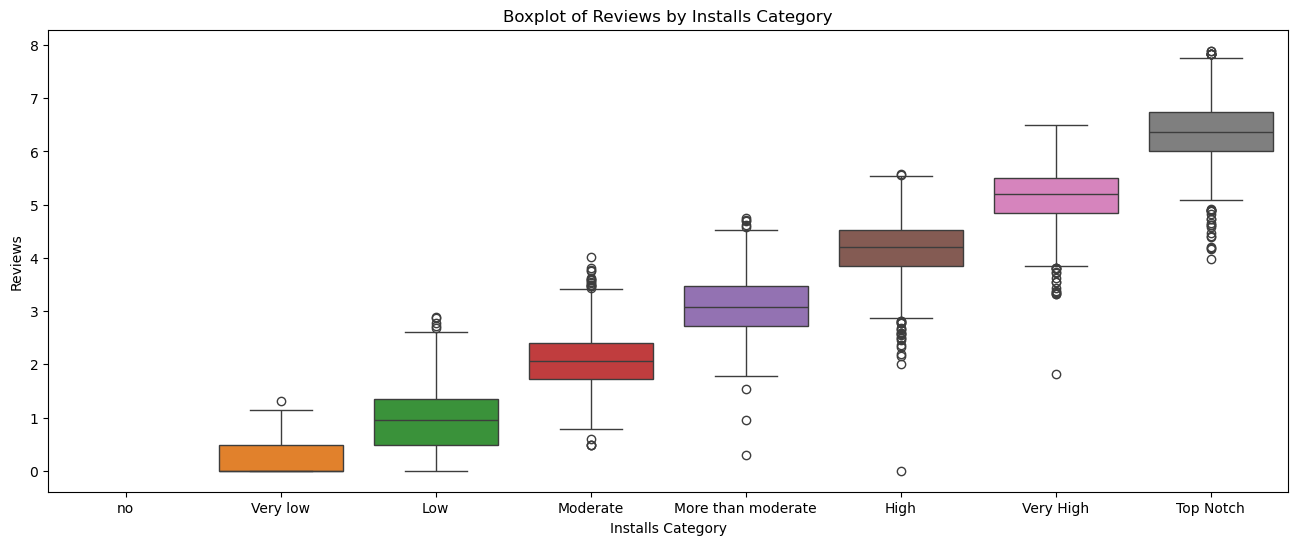

In [683]:
plt.figure(figsize=(16,6))
sns.boxplot(x='Installs_category', y=np.log10(df['Reviews']), hue='Installs_category', data=df)
plt.xlabel('Installs Category')
plt.ylabel('Reviews')
plt.title('Boxplot of Reviews by Installs Category')

<Axes: xlabel='Installs', ylabel='Reviews'>

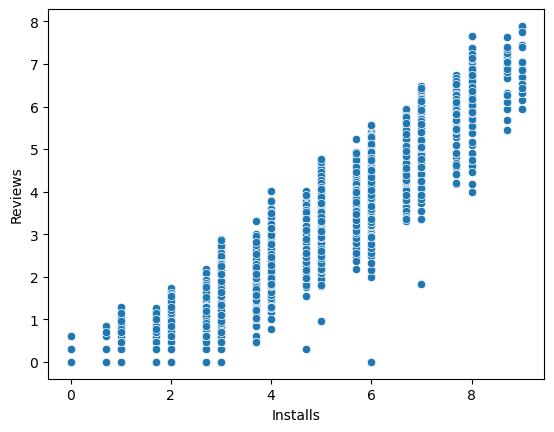

In [684]:
sns.scatterplot(x=np.log10(df['Installs']), y=np.log10(df['Reviews']), data=df)

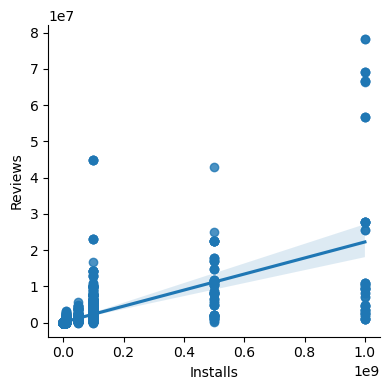

In [685]:
sns.lmplot(
    x='Installs',
    y='Reviews',
    data=df,
    height=4,      # height in inches
    aspect=1  # width = height × aspect
)


- Now we can check relation between Rating and Review, along Installs

<Axes: xlabel='Rating', ylabel='Reviews'>

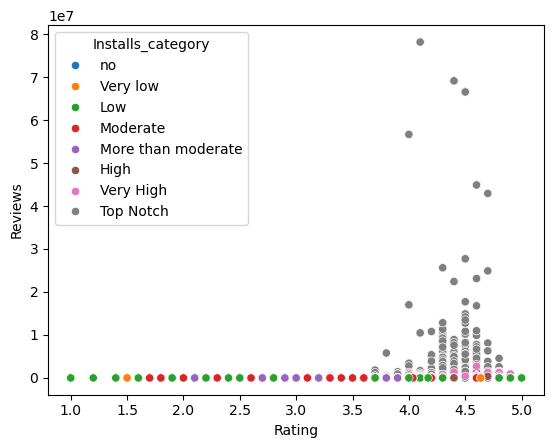

In [686]:
sns.scatterplot(y='Reviews', x='Rating', hue='Installs_category', data=df)

#### Observations:
- Ratings show a weak relationship with the number of Reviews.
- Reviews and Installs are strongly positively correlated.
- Ratings exhibit a weak to moderate association with Installs.

### **2.3. Duplicates**

We will check if any duplicates exist in our data , and then we will remove them.

In [687]:
print('Number of duplicate rows:', df.duplicated().sum())

Number of duplicate rows: 483


In [688]:
# Check whether the duplicates are real!
df[df.duplicated(keep=False)].sort_values(by=df.columns.tolist()).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_category
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8,500000,Free,0.00,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,High
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8,500000,Free,0.00,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,High
2322,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26.0,1000000,Free,0.00,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up,High
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26.0,1000000,Free,0.00,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up,High
2256,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8,1000,Paid,16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up,Low
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8,1000,Paid,16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up,Low
1337,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11506,15.0,100000,Free,0.00,Everyone,Health & Fitness,"August 2, 2018",3.0.0,4.1 and up,More than moderate
1434,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11506,15.0,100000,Free,0.00,Everyone,Health & Fitness,"August 2, 2018",3.0.0,4.1 and up,More than moderate
2522,420 BZ Budeze Delivery,MEDICAL,5.0,2,11.0,100,Free,0.00,Mature 17+,Medical,"June 6, 2018",1.0.1,4.1 and up,Low
7035,420 BZ Budeze Delivery,MEDICAL,5.0,2,11.0,100,Free,0.00,Mature 17+,Medical,"June 6, 2018",1.0.1,4.1 and up,Low


Yes! Duplicate values are real , so now we will remove them.
And Check the number of rows left in our dataset after removing duplicates.\
Previously we were having 10829 Rows


In [689]:
df.drop_duplicates(inplace=True)
print('Number of rows after removing duplicates:', df.shape[0])

Number of rows after removing duplicates: 10346


#### Observations:
- A total of 483 duplicate records were identified in the dataset.
- Upon removing these duplicates, the dataset size was reduced to 10,346 rows, improving data quality for further analysis.

---

# 3. Insights

In [690]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Installs_category'],
      dtype='object')

### **3.1. Top 10 Categories with high number of apps**

In [691]:
# Top 10 Categories with most apps
top10= df.Category.value_counts().sort_values(ascending=False).head(10)
top10

Category
FAMILY             1939
GAME               1121
TOOLS               841
BUSINESS            427
MEDICAL             408
PRODUCTIVITY        407
PERSONALIZATION     386
LIFESTYLE           373
COMMUNICATION       366
FINANCE             360
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 10 App Categories in Google Play Store')

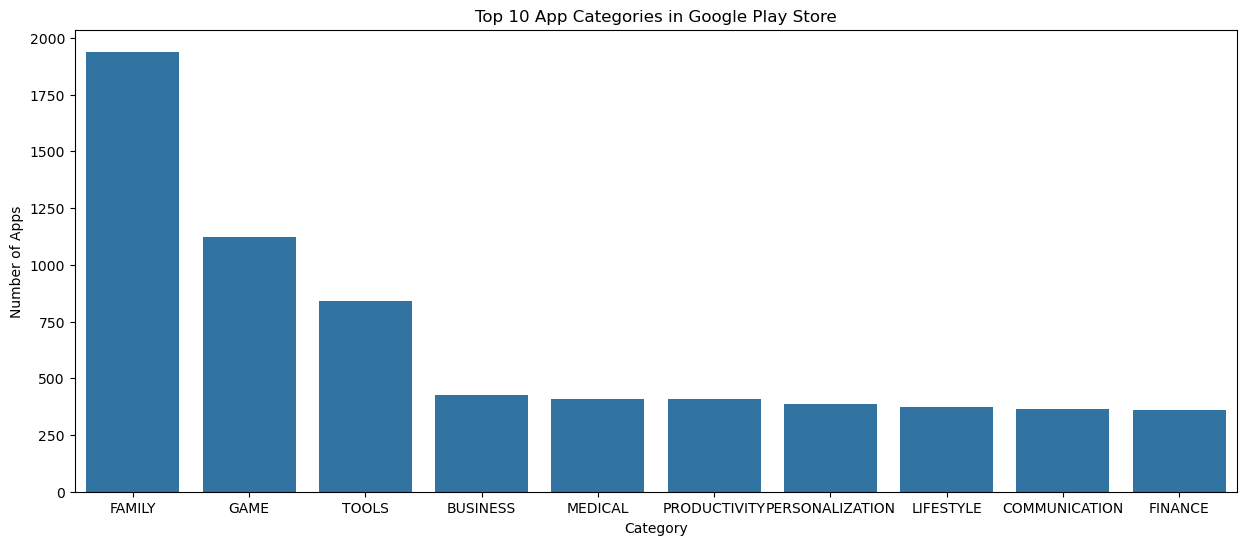

In [692]:
plt.figure(figsize=(15,6))
sns.barplot(x=top10.index, y=top10.values)
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.title('Top 10 App Categories in Google Play Store')


### **3.2. Which category has high number of installs**

In [693]:
high_installs= df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)
high_installs

Category
GAME                  31544024415
COMMUNICATION         24152276251
SOCIAL                12513867902
PRODUCTIVITY          12463091369
TOOLS                 11452271905
FAMILY                10041632405
PHOTOGRAPHY            9721247655
TRAVEL_AND_LOCAL       6361887146
VIDEO_PLAYERS          6222002720
NEWS_AND_MAGAZINES     5393217760
Name: Installs, dtype: int64

Text(0.5, 1.0, 'Top 10 Categories by Total Installs')

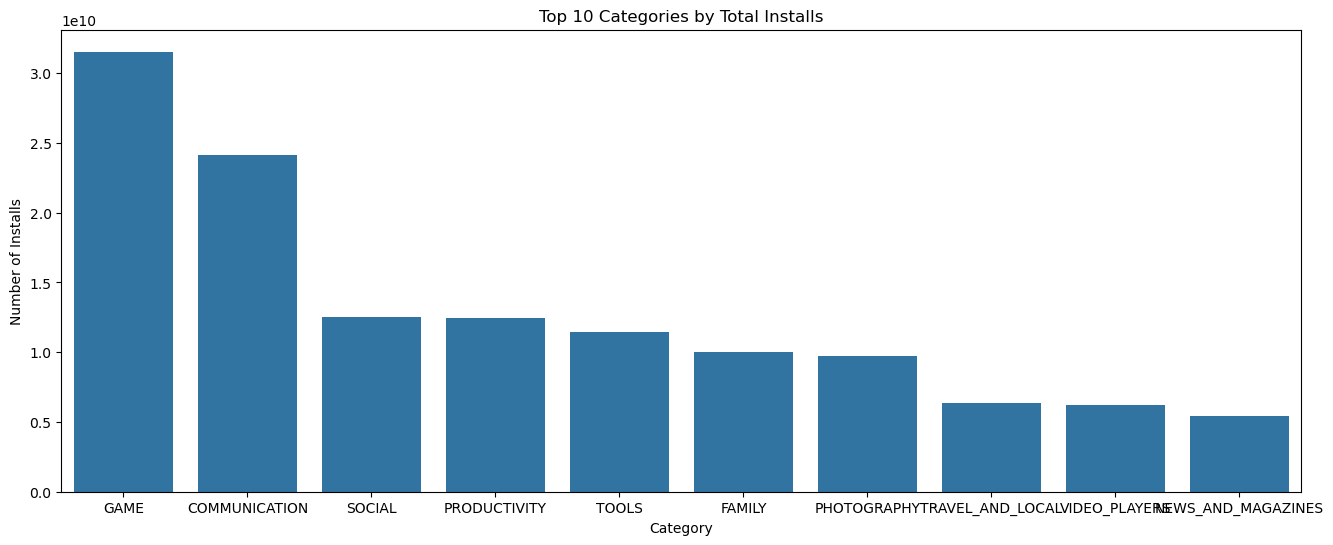

In [694]:
plt.figure(figsize=(16,6))
sns.barplot(x=high_installs.index, y=high_installs.values)
plt.xlabel('Category')
plt.ylabel('Number of Installs')
plt.title('Top 10 Categories by Total Installs')

### **3.3. Top-Rated Categories on the Play Store**

In [695]:
top_rated_category=df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)
top_rated_category

Category
EVENTS                 4.394346
EDUCATION              4.373794
ART_AND_DESIGN         4.367122
BOOKS_AND_REFERENCE    4.358435
PERSONALIZATION        4.333325
GAME                   4.281926
HEALTH_AND_FITNESS     4.273890
SOCIAL                 4.260441
PARENTING              4.259759
SHOPPING               4.253376
Name: Rating, dtype: float64

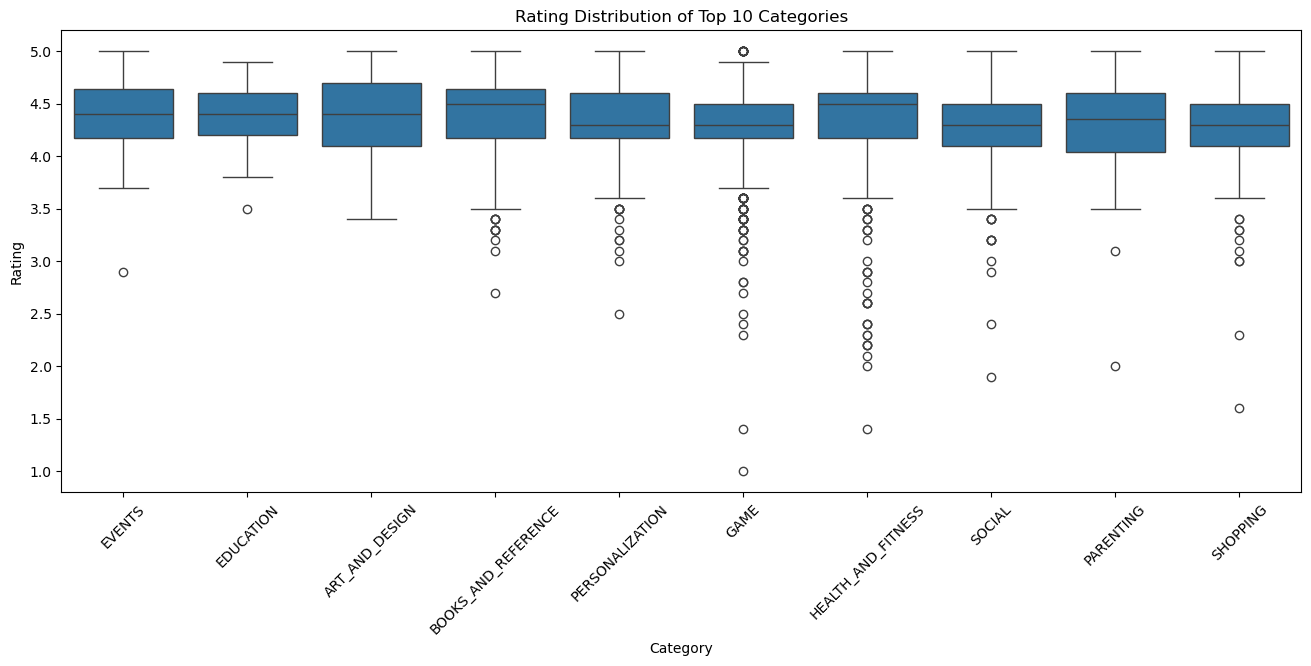

In [696]:
plt.figure(figsize=(16,6))
sns.boxplot(y='Rating', x='Category', data=df, order=df.groupby('Category')['Rating'].mean().sort_values(ascending=False).index[:10])
plt.xticks(rotation=45)
plt.title("Rating Distribution of Top 10 Categories")
plt.show()

### **3.4. Top-Reviewed Apps on the Play Store**

In [697]:
# Top 5 Reviewed Apps

top5_reviewed = df[['App', 'Reviews']].sort_values(by='Reviews', ascending=False).head(5)
top5_reviewed


,App,Reviews
2544,Facebook,78158306
3943,Facebook,78128208
336,WhatsApp Messenger,69119316
3904,WhatsApp Messenger,69109672
2604,Instagram,66577446


<Axes: xlabel='App', ylabel='Reviews'>

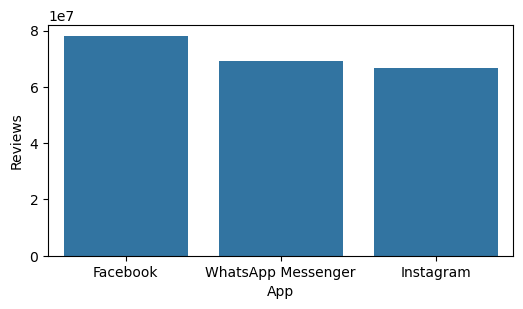

In [698]:
plt.figure(figsize=(6,3))
sns.barplot(x='App', y='Reviews', data=top5_reviewed)

### **3.5. Type of Apps more Installed**

In [699]:
type_more_installed= df.groupby('Type')['Installs'].sum()  
type_more_installed

Type
Free    146561162546
Paid        69174871
Name: Installs, dtype: int64

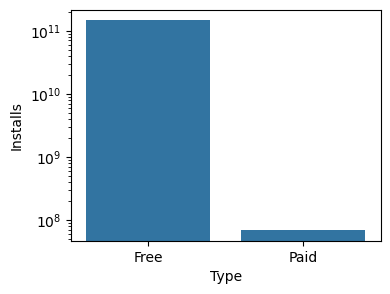

In [700]:
plt.figure(figsize=(4,3))
sns.barplot(x='Type', y='Installs', data=type_more_installed.reset_index())
plt.yscale('log')


### **3.6. Which price ranges are most common among paid apps?**

In [701]:
# Top 10 Common Price ranges for paid apps
paid_apps= df[df['Type']=='Paid']
common_prices = paid_apps.Price.value_counts().head(10)
common_prices


Price
0.99    144
2.99    125
1.99     73
4.99     70
3.99     60
1.49     45
5.99     27
2.49     25
9.99     19
6.99     12
Name: count, dtype: int64

<Axes: xlabel='Price'>

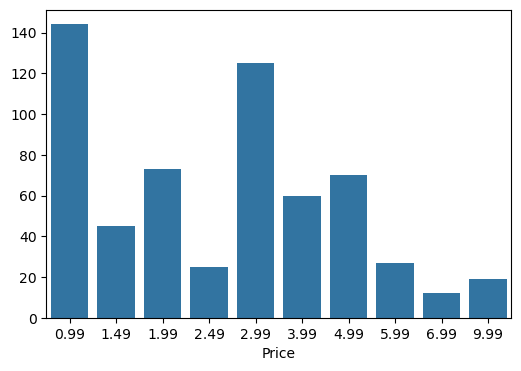

In [702]:
plt.figure(figsize=(6,4))
sns.barplot(x=common_prices.index, y=common_prices.values)

### **3.7. Which Genres most prefered in free apps?**

In [703]:
free_apps= df[df['Type']=='Free']
prefered_free_categories=free_apps.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(5)
prefered_free_categories


Category
GAME             31522924450
COMMUNICATION    24150916201
SOCIAL           12513861902
PRODUCTIVITY     12461679314
TOOLS            11450544474
Name: Installs, dtype: int64

<Axes: xlabel='Category'>

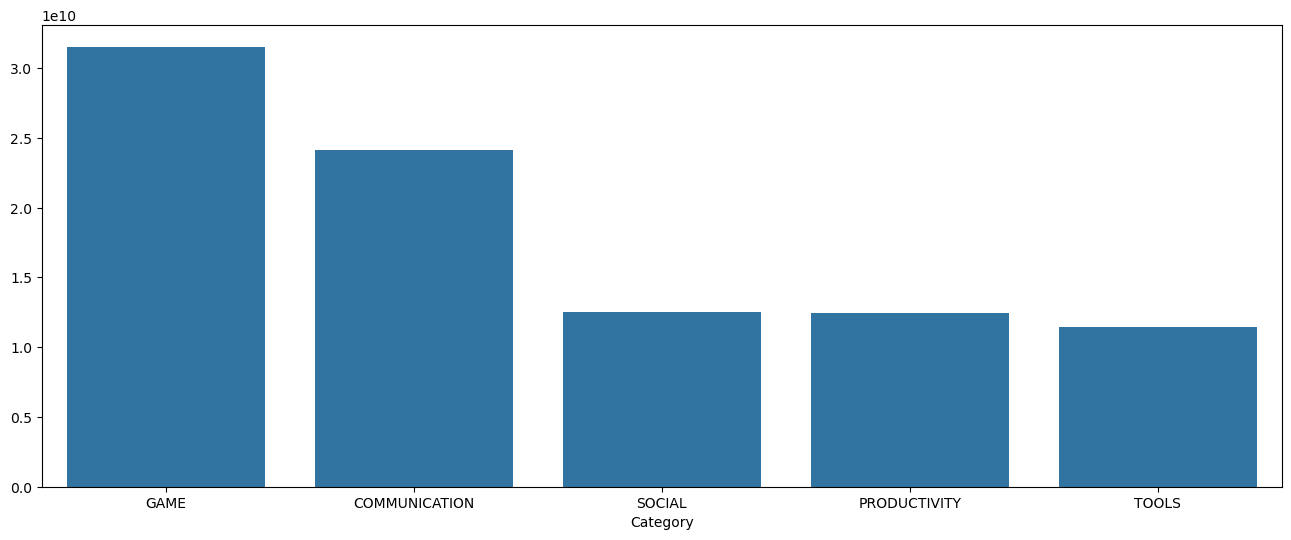

In [704]:
plt.figure(figsize=(16,6))
sns.barplot(x=prefered_free_categories.index, y=prefered_free_categories.values)

### **3.8. Which apps have not been updated for the longest time?**

In [705]:
# Convert Last updated to datetime format
last_updated = pd.to_datetime(df['Last Updated'], format='%B %d, %Y')
# Calculate the number of days since last update
years_since_update = ((pd.Timestamp.today() - last_updated).dt.days / 365).round(2)

# Apps not updated for so long
apps_not_updated = pd.DataFrame({
    'App': df['App'],
    'Years_Since_Update': years_since_update
}).sort_values(by='Years_Since_Update', ascending=False).head(10)

apps_not_updated

,App,Years_Since_Update
7479,FML F*ck my life + widget,15.70
7430,CJ Poker Odds Calculator,15.00
10282,FD Shift Calendar Widget,14.88
8418,DEER HUNTER CHALLENGE,14.81
9067,Dx Ludo,14.79
8084,Freecell CY,14.79
5144,AH Alarm Panel,14.72
7237,CF-Bench Pro,14.61
10460,Wi-Fi Rabbit Unlock Key,14.60
1544,Apk Installer,14.59


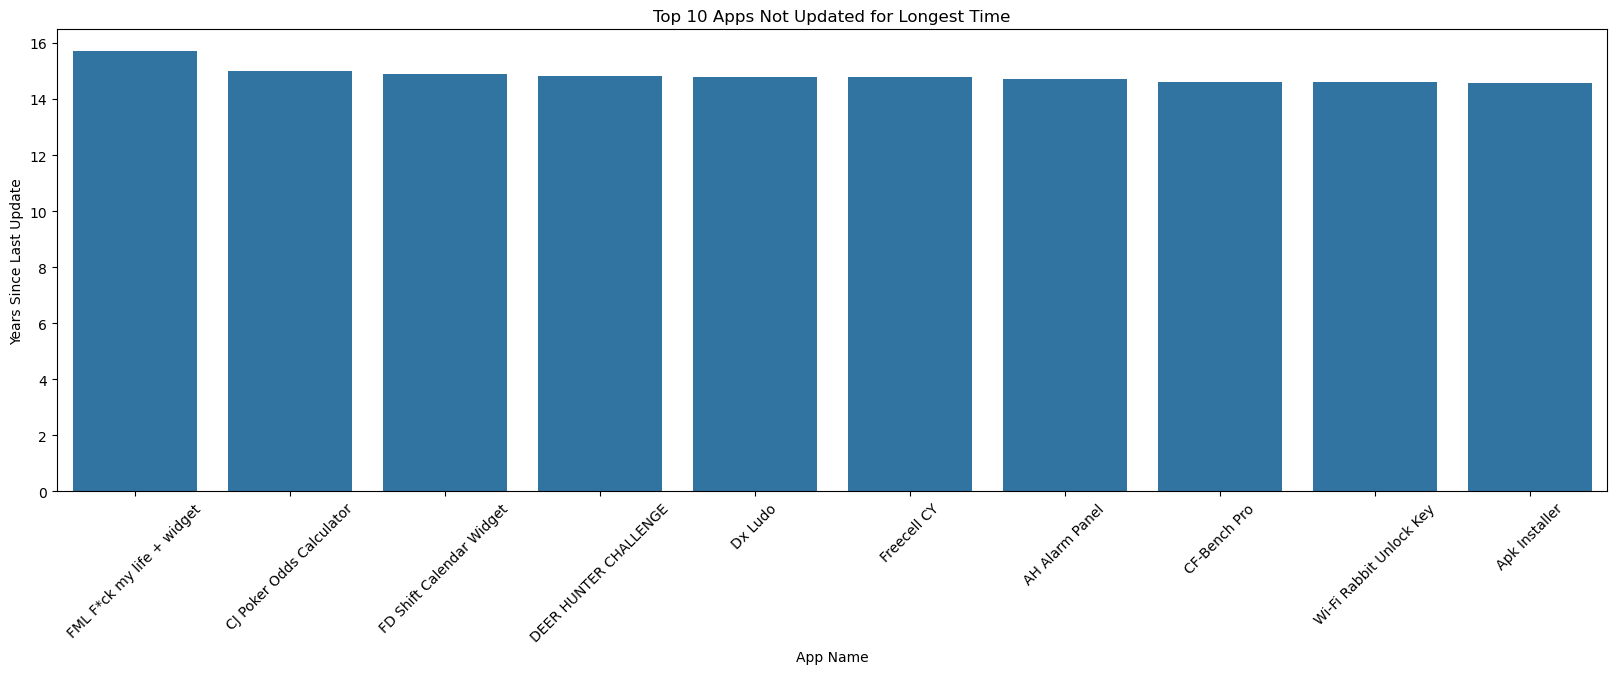

In [492]:
plt.figure(figsize=(20,6))
sns.barplot(x='App', y='Years_Since_Update', data=apps_not_updated)
plt.xticks(rotation=45)
plt.xlabel("App Name")
plt.ylabel("Years Since Last Update")
plt.title("Top 10 Apps Not Updated for Longest Time")
plt.show()

### **3.9. Which Android versions are most supported by apps?**

In [493]:
df['Android Ver'].value_counts().head(5)

Android Ver
4.1 and up            2379
4.0.3 and up          1451
4.0 and up            1335
Varies with device    1220
4.4 and up             894
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 5 Android Versions Required')

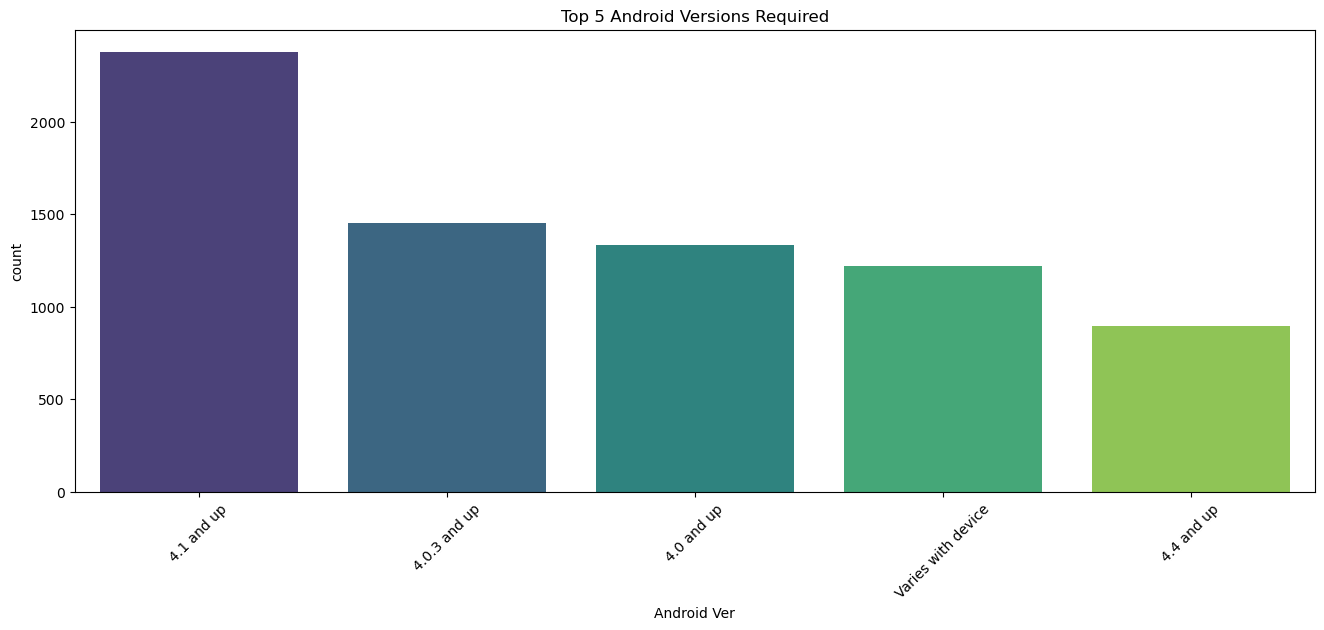

In [494]:
plt.figure(figsize=(16,6))
sns.countplot(x='Android Ver', data=df, order=df['Android Ver'].value_counts().head(5).index, palette='viridis')
plt.xticks(rotation=45)
plt.title("Top 5 Android Versions Required")

### **3.10. Which content rating group has the highest installs?**

In [707]:
high_install_content= df.groupby(['Content Rating'])['Installs'].sum().sort_values(ascending=False)
high_install_content

Content Rating
Everyone           100228037851
Teen                30918280393
Everyone 10+        11191271795
Mature 17+           4290696878
Adults only 18+         2000000
Unrated                   50500
Name: Installs, dtype: int64

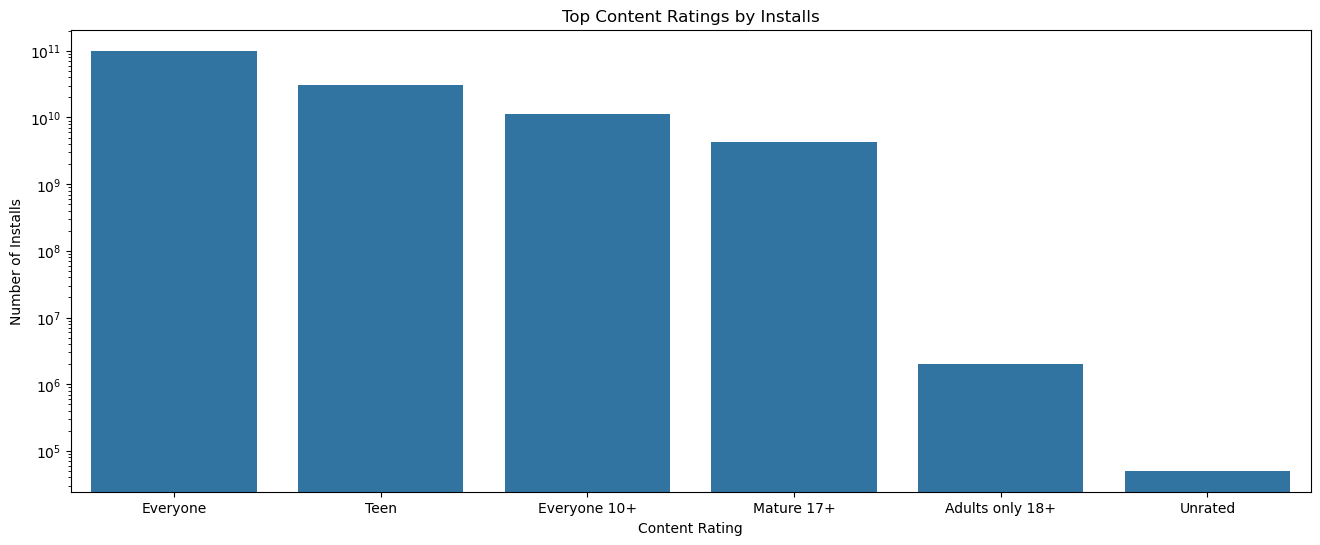

In [496]:
plt.figure(figsize=(16,6))
sns.barplot(x=high_install_content.index, y=high_install_content.values)
plt.xlabel('Content Rating')
plt.ylabel('Number of Installs')
plt.title("Top Content Ratings by Installs")
plt.yscale('log')


### **3.11. Do apps with larger file sizes tend to have higher or lower ratings?**

In [497]:
# df.Size.value_counts().sort_index(ascending=False)
large_apps_rating = df.groupby('Size')['Rating'].mean().sort_index(ascending=False).head(10)
large_apps_rating

Size
100.0    4.281250
99.0     4.409762
98.0     4.360534
97.0     4.226316
96.0     4.254839
95.0     4.341176
94.0     4.206667
93.0     4.384731
92.0     4.197926
91.0     4.390476
Name: Rating, dtype: float64

<Axes: xlabel='Size', ylabel='Rating'>

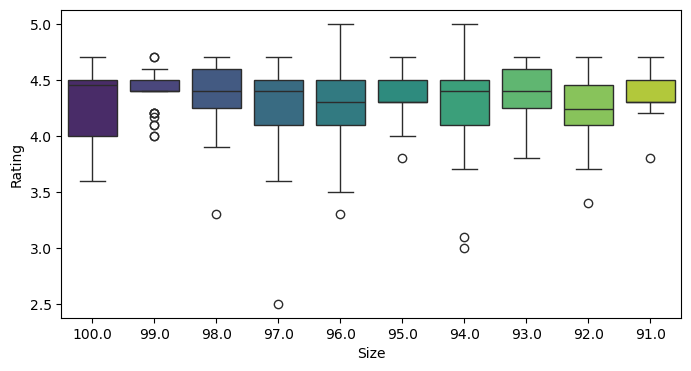

In [498]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Size', y='Rating', order=large_apps_rating.index, data=df, palette='viridis')

### **3.12. Which categories have the highest number of paid apps?**

In [499]:
print("Total Number of paid apps :", len(paid_apps))

Total Number of paid apps : 762


In [500]:
# Most common categories among paid apps
paid_apps.Category.value_counts().head(5)

Category
FAMILY             186
MEDICAL             84
GAME                83
PERSONALIZATION     81
TOOLS               77
Name: count, dtype: int64

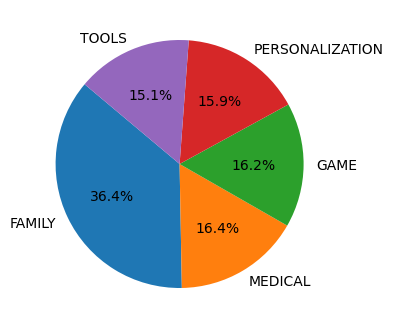

In [501]:
plt.figure(figsize=(4,5))
plt.pie(paid_apps['Category'].value_counts().head(5), labels=paid_apps['Category'].value_counts().head(5).index, autopct='%1.1f%%', startangle=140)
plt.show()

### **3.13. Which apps have a lot of installs but low reviews?**

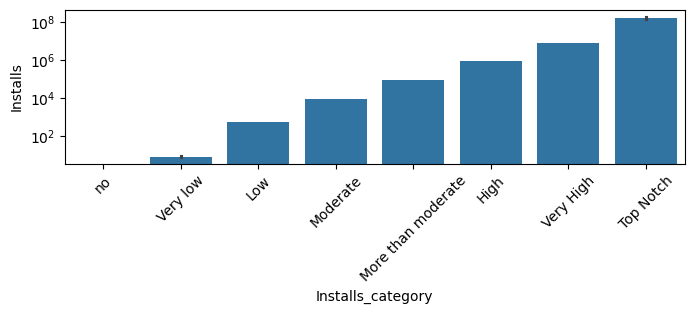

In [502]:
# Install Category with most installs
plt.figure(figsize=(8,2))
sns.barplot(x='Installs_category',y='Installs', data=df)
plt.xticks(rotation=45)
plt.yscale('log')

In [503]:
# Top Notch Apps with least reviews
least_review_topnotch= df[df['Installs_category']=='Top Notch'][['App','Reviews']].sort_values(by='Reviews').head(10)
least_review_topnotch

,App,Reviews
3261,Samsung Calculator,9602
225,Secure Folder,14760
3489,Samsung Notes,15368
3125,VZ Navigator,16101
3237,Motorola Alert,24199
3691,Samsung Video Library,25922
3243,Device Help,28860
3238,Motorola Assist,37333
3242,Calculator,40770
4605,T-Mobile Visual Voicemail,41502


Text(0.5, 1.0, 'Top Notch Apps with Least Reviews')

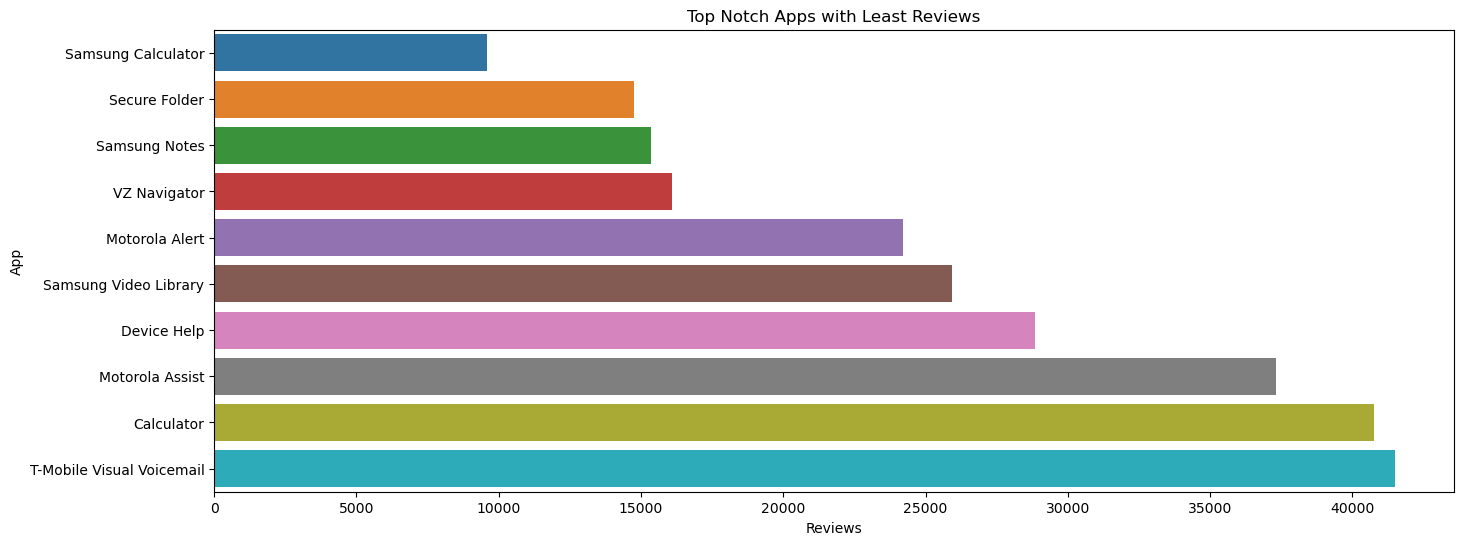

In [504]:
plt.figure(figsize=(16,6))
sns.barplot(y=least_review_topnotch['App'], x=least_review_topnotch['Reviews'], hue=least_review_topnotch['App'])
plt.title("Top Notch Apps with Least Reviews")

### **3.14. Top 5 rated Paid Apps**

In [508]:
paid_apps[['App','Rating']].sort_values(by='Rating', ascending=False).head(5)

,App,Rating
7204,TI-84 CE Graphing Calculator Manual TI 84,5.0
7377,CI 174 Gray Icon Pack,5.0
7477,USMLE Step 2 CK Flashcards,5.0
2271,FHR 5-Tier 2.0,5.0
2262,Super Hearing Secret Voices Recorder PRO,5.0


<Axes: xlabel='App', ylabel='Rating'>

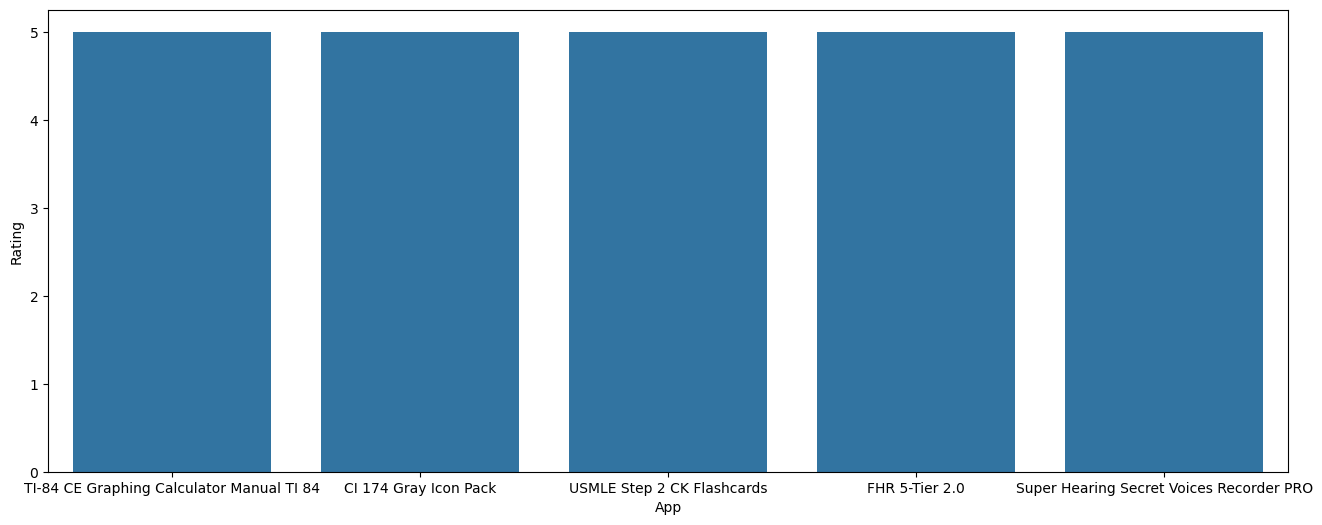

In [510]:
plt.figure(figsize=(16,6))
sns.barplot(x='App', y='Rating', data=paid_apps.sort_values(by='Rating', ascending=False).head(5))


### **3.15. Do Size of app effect No of Installs?**

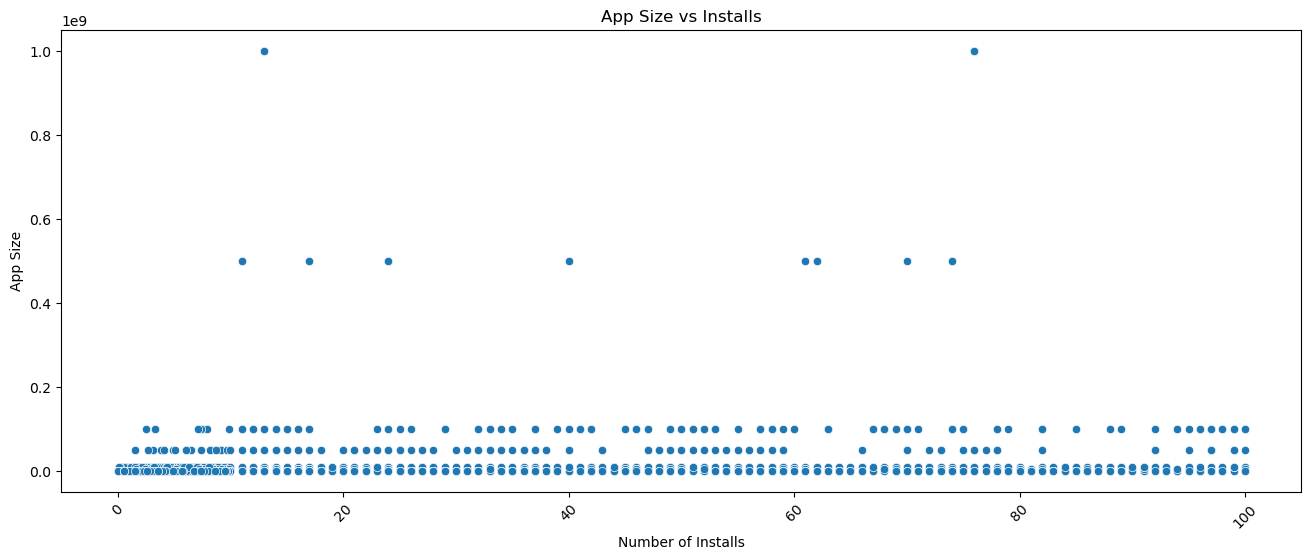

In [521]:
plt.figure(figsize=(16,6))
sns.scatterplot(y='Installs', x='Size', data=df)
plt.xticks(rotation=45)
plt.xlabel("Number of Installs")
plt.ylabel("App Size")
plt.title("App Size vs Installs")
plt.show()

## **Summary**

The EDA exercise conducted on the GooglePlaystore dataset has yielded numerous interesting insights. The dataset was found to be relatively clean and consistent throughout the analysis.The following summarizes the key insights and observations derived from the dataset:

- ***Family***, ***Games***, and ***Tools*** dominate in terms of the number of apps, showing that developers focus heavily on entertainment and practical utility to attract a wide audience.

- ***Game***, ***Communication***, ***Social***, ***Productivity***, and ***Tools*** categories have the highest total installs, indicating demand in these areas.

- Top-rated categories include ***Event***, ***Education***, ***Art & Design***, and ***Books & Reference***, suggesting that users value informative and high-quality apps.

- ***Facebook***, ***WhatsApp***, and ***Instagram*** consistently receive the most reviews, reflecting active user interaction.

- Free apps account for far more installs than paid apps.

- Common price points for paid apps, such as $0.99, $1.49, $1.99, up to $9.99, indicate that users prefer affordable premium offerings.

- Among free apps, the most popular genres are ***Game***, ***Communication***, ***Social***, ***Productivity***, and ***Tools***.

- Several apps, like ***FML F*ck My Life + Widget***, ***CJ Poker Odds Calculator***, ***FD Shift Calendar Widget***, and ***Deer Hunter Challenge***, have not been updated for over 15 years, suggesting reduced usability for modern devices.

- Most apps support Android versions 4.1 and up, 4.0.3 and up, 4.0 and up, Varies with device, and 4.4 and up, showing developers’ efforts to maximize device compatibility and reach a broad audience.

- Apps rated 'Everyone' and 'Teen' attract the highest number of installs, while 'Unrated' apps have the least, suggesting that content rating influences user engagement.

- While larger app sizes do not guarantee higher ratings, apps with bigger file sizes generally maintain good average ratings.

- Paid apps are most concentrated in ***Family***, ***Medical***, and ***Game*** categories, suggesting that these areas are more actively monetized by developers.

- Some apps, such as ***Samsung Calculator***, ***Secure Folder***, ***Samsung Notes***, and ***VZ Navigator***, achieve extremely high installs but comparatively low review counts, showing that popularity does not always translate into user feedback.

- Top-rated paid apps include ***CI 174 Gray Icon Pack***, ***FHR 5-Tier 2.0***, and ***USMLE Step 2 CK Flashcards***.

- Overall, app size does not have a clear impact on the number of installs, as apps of all sizes achieve varying install counts.

---

#### **Conclusion & Findings**
The primary goal of this project is to analyze the Google Play Store dataset and uncover meaningful insights from the data. This analysis helps developers and stakeholders understand user preferences and trends, enabling better decision-making for future app development.

During this EDA exercise, we have achieved several milestones:

- The dataset has been cleaned to handle missing values.
- No exact duplicates were found. While some app names appear multiple times, each record is unique with different versions, or release date.

Our findings include:

- Games and Family apps have the highest number of listings.
- Free apps account for the majority of installs.
- Top-rated apps are concentrated in Education and Art & Design categories.